In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [92]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [93]:
X = df.drop(['Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g'], axis = 1)
y = df['Average']


In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [69]:
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [70]:
print(best_params)
print(gsc.score(x_train,y_train))

{'C': 1000, 'epsilon': 0.0001, 'gamma': 0.001}
-2.3590517370869697e-07


In [95]:
SupportVectorRegModel = SVR(kernel='rbf', gamma = 0.001, C = 1000, epsilon = 0.0001)
SupportVectorRegModel.fit(x_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [96]:
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([-74.0909831 , -74.18191721, -74.0909831 , -74.18191721,
       -75.00014337, -75.54529621, -75.45445808, -75.27275521,
       -74.81837037, -74.36385652, -74.63657685, -74.63657685,
       -74.81837037, -75.27275521, -74.45476669, -74.81837037,
       -75.63612463, -75.00014337, -74.81837037, -74.81837037,
       -74.09111077, -74.54567361, -74.09111077, -74.18202815,
       -76.90524599, -73.72740129, -73.45469102, -73.36378804,
       -73.00018631, -73.00018631, -73.81830407, -73.81830407,
       -73.72740129, -73.45469102, -73.63649796, -73.54559443,
       -74.36368862, -74.45457693, -74.00010659, -73.81830407,
       -73.81830407, -73.72740129, -73.63649796, -73.45469102,
       -73.09082024, -73.63608809, -72.45474222, -72.72733262,
       -72.54560279, -71.81881923, -72.2730309 , -72.00049154,
       -72.09133405, -75.7252547 , -72.45474222, -72.09133405,
       -72.81820141, -72.63646633, -72.90907246, -72.63646633,
       -72.45474222, -72.63646633, -72.99994549, -72.54

In [97]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.00248039816409347

In [98]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.090983
497,-74.181818,-74.181917
498,-74.090909,-74.090983
499,-74.181818,-74.181917
500,-75.000000,-75.000143
...,...,...
615,-70.363636,-70.369770
616,-70.181818,-70.188591
617,-70.454545,-70.460373
618,-70.363636,-70.369770


In [99]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0013971846741658658
Mean Squared Error: 6.152375052438257e-06
Root Mean Squared Error: 0.00248039816409347


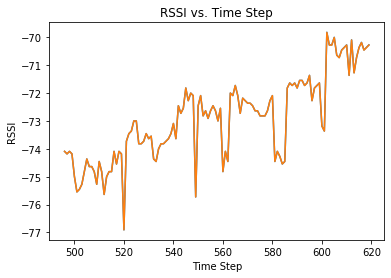

In [100]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.title('RSSI vs. Time Step')
plt.xlabel('Time Step')
plt.ylabel('RSSI')
plt.show()

In [145]:
SupportVectorRegModel = SVR(kernel='rbf', gamma = 0.0001, C = 20, epsilon = 0.6)
SupportVectorRegModel.fit(X, y)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.6, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [146]:
y_pred = SupportVectorRegModel.predict(X)
y_pred

array([-66.50756736, -66.07113097, -65.4903131 , -65.78055574,
       -65.99845724, -65.41780709, -65.78055574, -65.41780709,
       -65.34532364, -65.1280123 , -67.30925354, -67.67421519,
       -65.41780709, -64.54959722, -64.62180891, -64.33312456,
       -64.26102233, -64.11690295, -63.97289938, -64.26102233,
       -68.80018822, -66.97324396, -67.04617909, -67.7032113 ,
       -67.19209293, -67.04617909, -66.60880071, -66.68165718,
       -66.31754652, -66.24477768, -66.3903336 , -66.3903336 ,
       -67.11912886, -66.17202745, -67.26507093, -67.04617909,
       -66.82741911, -67.3380625 , -67.19209293, -67.41106728,
       -67.95632202, -68.02945958, -67.59079559, -67.66387816,
       -67.66387816, -67.66387816, -67.29858974, -67.22557119,
       -67.22557119, -67.51772511, -70.00673544, -69.05426175,
       -68.76132074, -68.32210533, -70.59293511, -68.83454745,
       -67.8100781 , -68.10260705, -67.44466706, -67.73697245,
       -67.55650911, -67.62962206, -68.14172916, -68.36

In [147]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

0.3365448189633139

In [148]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df

,Actual,Predicted
0,-66.181818,-66.507567
1,-65.636364,-66.071131
2,-64.909091,-65.490313
3,-65.272727,-65.780556
4,-65.545455,-65.998457
...,...,...
615,-70.363636,-70.945872
616,-70.181818,-70.799966
617,-70.454545,-71.018824
618,-70.363636,-70.945872


In [149]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.25966335266732765
Mean Squared Error: 0.11326241517104972
Root Mean Squared Error: 0.3365448189633139


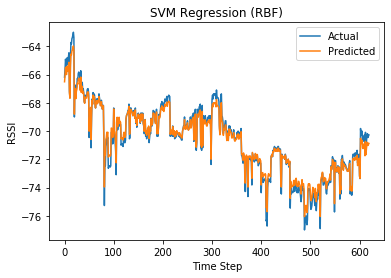

In [150]:
df.Actual.plot( legend = True)
df.Predicted.plot( legend = True)
plt.title('SVM Regression (RBF)')
plt.xlabel('Time Step')
plt.ylabel('RSSI')
plt.show()
